# Testing hypothesis that difference of two lognormal distributions is a Cauchy distribution

When analysing the tracking data, one distribution that I produced was a growth/decay of MCS area. I had previously found that a) area was approximately lognormal, and b) that a Cauchy distribution approximately fitted the growth/decay distribution. This led me to think that perhaps the difference of lognormal distributions was equivalent to the ratio of normal distributions -- which gives a Cauchy distribution. However, I think this was wrong now, essentially because the subtraction is being applied to the exponential, not the log, of the lognormal. Synthetic data backs this up. The difference of two lognormal distributions is close to, but not exactly, a Cauchy distribution. On closer examintation of the original growth/decay distribution, the Cauchy distribution underestimates the actual distribution around the peak as well, as for the synthetic data, although it is a little harder to see because of using fewer bins.

## Theory

The Cauchy distribution $C$ can be constructed by taking the ratio of two normal distributions (N.B. cannot get ~ working, so using = for distributions):

\begin{align}
    X_1 = N(0, 1)\\
    X_2 = N(0, 1)\\
    C = \frac{X_2}{X_1}\\
\end{align}

Suppose we have two lognormal distributions, is their difference $D$ also a Cauchy distribution?

\begin{align}
    Y_1 = e^{N(0, 1)}\\
    Y_2 = e^{N(0, 1)}\\
    D = Y_2 - Y_1 = e^{N(0, 1)} - e^{N(0, 1)}\\
\end{align}

I do not think the RHS of the final equation can be simplified. The subtraction would have to apply to the log part of lognormal, not the exp part. (N.B. would expnormal not be a better name for this distribution??) Even then, there would still be a log operation that would have to be undone.




## Practice

Construct distributions as defined above. Calculate ratio/difference and fit a Cauchy distribution. What do I find? $\frac{X_2}{X_1}$ is well fitted by a Cauchy distribution. $Y_2 - Y_1$ is close to Cauchy, but Cauchy underestimates between +/-5 and overestimates further from 0 than that.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, cauchy, norm

In [2]:
X1 = norm.rvs(loc=0, scale=1, size=1000000)
X2 = norm.rvs(loc=0, scale=1, size=1000000)

In [3]:
cauchy_args = cauchy.fit(X2 / X1)

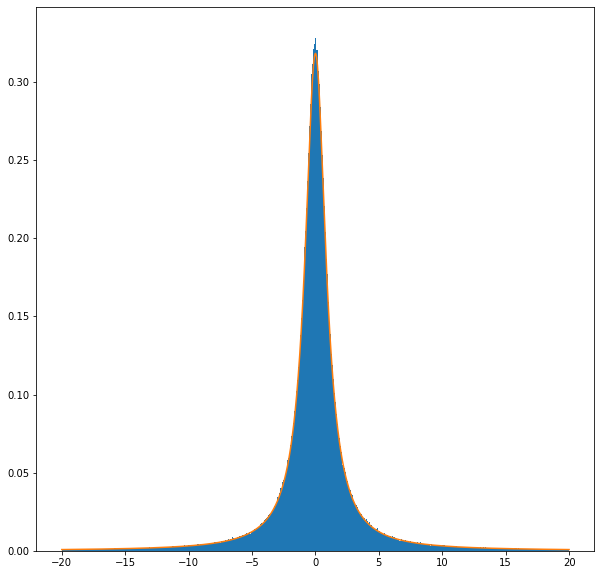

In [4]:
bins=np.linspace(-20, 20, 1001)
fig = plt.figure()
fig.set_size_inches((10, 10))
plt.hist(X2 / X1, bins=bins, density=True)
plt.plot(bins, cauchy.pdf(bins, *cauchy_args));

In [5]:
Y1 = lognorm.rvs(1, loc=0, scale=1, size=1000000)
Y2 = lognorm.rvs(1, loc=0, scale=1, size=1000000)

In [6]:
cauchy_args = cauchy.fit(Y2 - Y1)

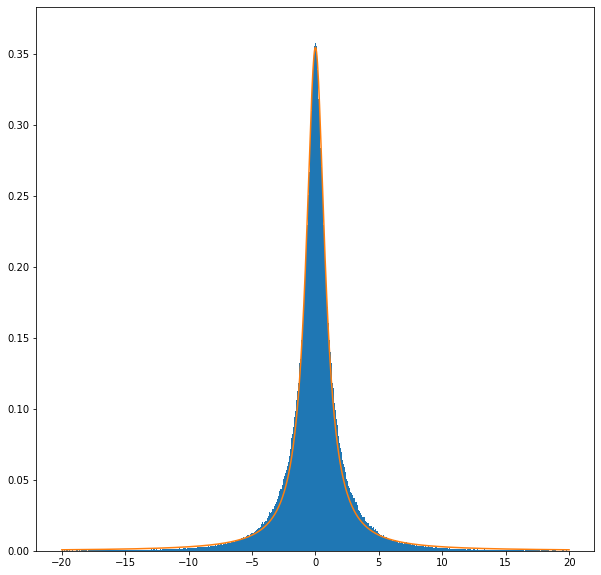

In [7]:
bins=np.linspace(-20, 20, 1001)
# Note, without enough bins you cannot see the under/overestimation.
fig = plt.figure()
fig.set_size_inches((10, 10))
plt.hist(Y2 - Y1, bins=bins, density=True)
plt.plot(bins, cauchy.pdf(bins, *cauchy_args));